In [5]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [6]:
# Import data
data = pd.read_csv('../../Fish.csv')

In [7]:
# EDA
data.shape

(159, 7)

In [8]:
# Display the first entry
data.head(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.52,4.02


In [9]:
# Display the last entry
data.tail(1)

,Species,Weight,Length1,Length2,Length3,Height,Width
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [10]:
# Display a random sample of 7 entries
data.sample(7)

,Species,Weight,Length1,Length2,Length3,Height,Width
108,Perch,320.0,27.8,30.0,31.6,7.6156,4.7716
112,Perch,685.0,34.0,36.5,39.0,10.8810,6.8640
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600
120,Perch,900.0,37.0,40.0,42.5,11.7300,7.2250
98,Perch,188.0,22.6,24.6,26.2,6.7334,4.1658
41,Roach,110.0,19.1,20.8,23.1,6.1677,3.3957


In [11]:
# Check data types
data.dtypes

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [12]:
# basic summary statistics for numeric data
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [13]:
# basic summary statistics for categorical data
data.describe(include="object")

,Species
count,159
unique,7
top,Perch
freq,56


In [14]:
# Check duplicates
data.duplicated().sum()

np.int64(0)

In [15]:
# Check missing values
data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [16]:
# examples
def format_example_values(series):
    vals = series.dropna().unique()[:5]
    
    formatted = []
    for v in vals:
        if isinstance(v, (int, float, np.number)):
            formatted.append(f"{v:.2f}")
        else:
            formatted.append(str(v))
    return ", ".join(formatted)

summary_df = pd.DataFrame({
    "Feature/variable": data.columns,
    "Data type": data.dtypes.values.astype(str),
    #"Description": [""] * len(data.columns),
    "Number of Unique values": [data[col].nunique() for col in data.columns],
    "Example values": [format_example_values(data[col]) for col in data.columns]
})

# Show all rows without truncation
with pd.option_context("display.max_rows", None, "display.max_colwidth", None):
    print(summary_df.to_markdown(index=False))


| Feature/variable   | Data type   |   Number of Unique values | Example values                         |
|:-------------------|:------------|--------------------------:|:---------------------------------------|
| Species            | object      |                         7 | Bream, Roach, Whitefish, Parkki, Perch |
| Weight             | float64     |                       101 | 242.00, 290.00, 340.00, 363.00, 430.00 |
| Length1            | float64     |                       116 | 23.20, 24.00, 23.90, 26.30, 26.50      |
| Length2            | float64     |                        93 | 25.40, 26.30, 26.50, 29.00, 29.70      |
| Length3            | float64     |                       124 | 30.00, 31.20, 31.10, 33.50, 34.00      |
| Height             | float64     |                       154 | 11.52, 12.48, 12.38, 12.73, 12.44      |
| Width              | float64     |                       152 | 4.02, 4.31, 4.70, 4.46, 5.13           |


In [17]:
# basic summary statistics for numerical variables
# Select only numeric columns
num_df = data.select_dtypes(include="number")

# Compute descriptive statistics
summary_table = num_df.describe().loc[
    ["count", "mean", "std", "min", "25%", "50%", "75%", "max"]
]

# Optional: round to 2 decimals
summary_table = summary_table.round(2)

summary_table = summary_table.T

print(summary_table.to_markdown())

|         |   count |   mean |    std |   min |    25% |    50% |    75% |     max |
|:--------|--------:|-------:|-------:|------:|-------:|-------:|-------:|--------:|
| Weight  |     159 | 398.33 | 357.98 |  0    | 120    | 273    | 650    | 1650    |
| Length1 |     159 |  26.25 |  10    |  7.5  |  19.05 |  25.2  |  32.7  |   59    |
| Length2 |     159 |  28.42 |  10.72 |  8.4  |  21    |  27.3  |  35.5  |   63.4  |
| Length3 |     159 |  31.23 |  11.61 |  8.8  |  23.15 |  29.4  |  39.65 |   68    |
| Height  |     159 |   8.97 |   4.29 |  1.73 |   5.94 |   7.79 |  12.37 |   18.96 |
| Width   |     159 |   4.42 |   1.69 |  1.05 |   3.39 |   4.25 |   5.58 |    8.14 |


In [18]:
# basic summary statistics for categorical variables
# Select categorical/object columns
cat_df = data.select_dtypes(include=["object", "category"])

summary = pd.DataFrame(index=cat_df.columns)

# Count of non-missing values
summary["Count"] = cat_df.count()

# Number of unique values
summary["Number of unique values"] = cat_df.nunique()

# Most frequent value
summary["Most frequent value"] = cat_df.mode().iloc[0]

# Frequency of most frequent value
summary["Most frequent value (frequency)"] = [
    cat_df[col].value_counts().iloc[0] if cat_df[col].nunique() > 0 else 0
    for col in cat_df.columns
]

# Least frequent value
summary["Least frequent value"] = [
    cat_df[col].value_counts().idxmin() if cat_df[col].nunique() > 0 else None
    for col in cat_df.columns
]

# Frequency of least frequent value
summary["Least frequent value (frequency)"] = [
    cat_df[col].value_counts().iloc[-1] if cat_df[col].nunique() > 0 else 0
    for col in cat_df.columns
]

# Flip rows and columns
summary = summary.T

print(summary.to_markdown())

|                                  | Species   |
|:---------------------------------|:----------|
| Count                            | 159       |
| Number of unique values          | 7         |
| Most frequent value              | Perch     |
| Most frequent value (frequency)  | 56        |
| Least frequent value             | Whitefish |
| Least frequent value (frequency) | 6         |


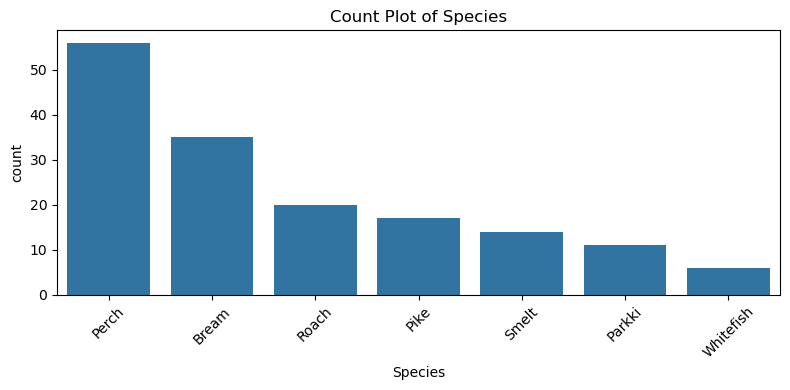

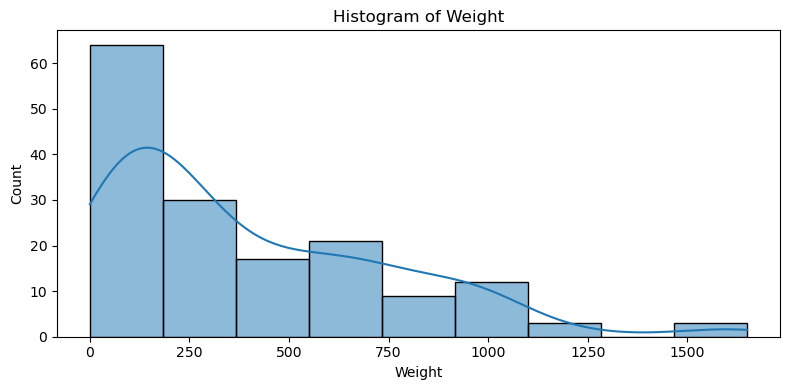

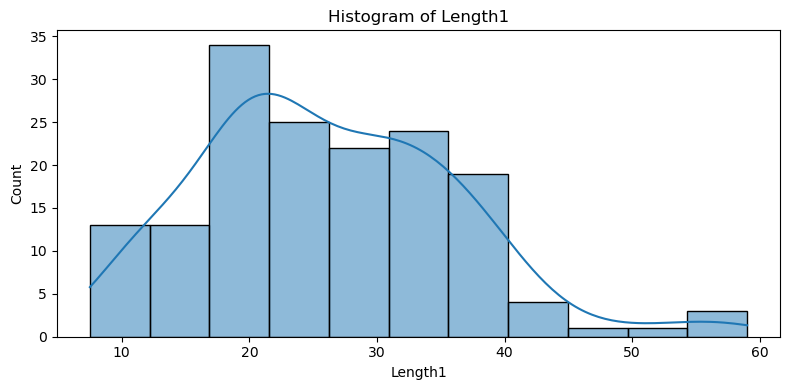

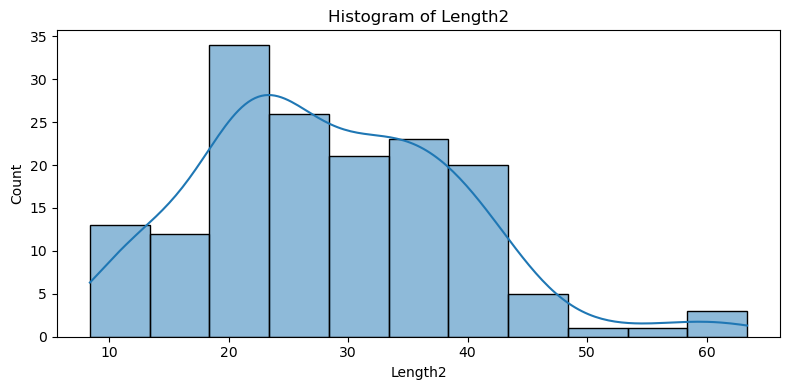

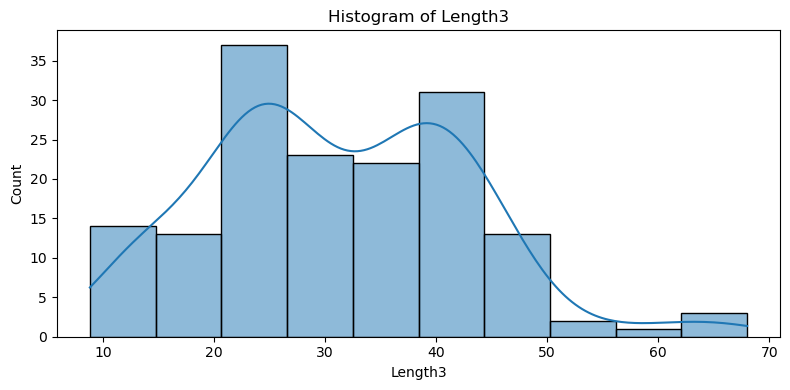

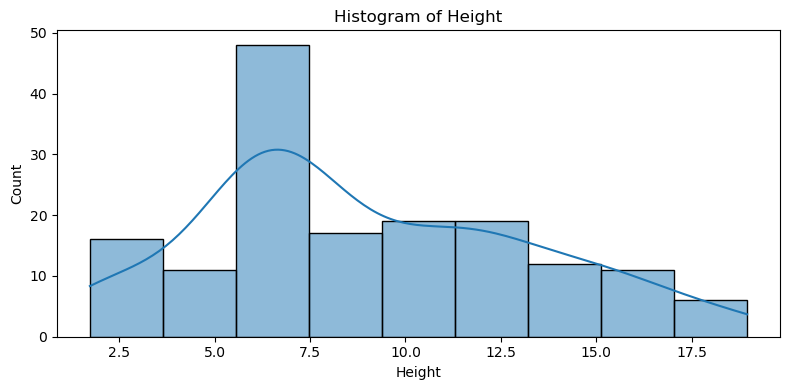

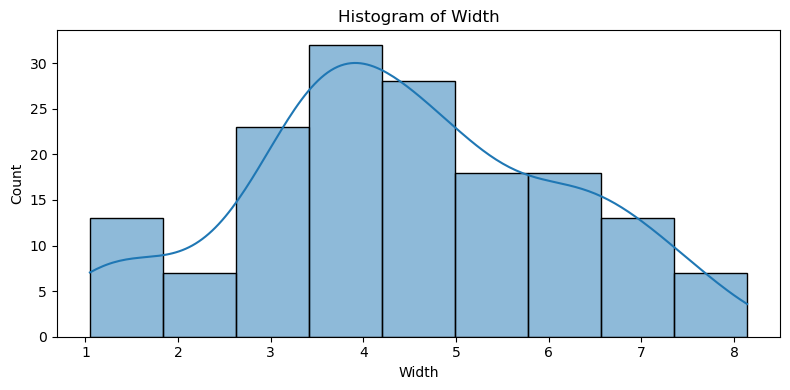

In [19]:
# basic plots for categorical and numerical variables to check distributions and counts (histogram, barplot)
for col in data.columns:
    plt.figure(figsize=(8, 4))
    if data[col].dtype in ['object', 'category']:
        sns.countplot(data=data, x=col, order=data[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xticks(rotation=45)
    else:
        sns.histplot(data=data, x=col, kde=True)
        plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

## Model Training

In [30]:
dataset = pd.read_csv("../../Fish.csv")

In [31]:
dataset.corr(numeric_only=True)

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


<Axes: xlabel='Species'>

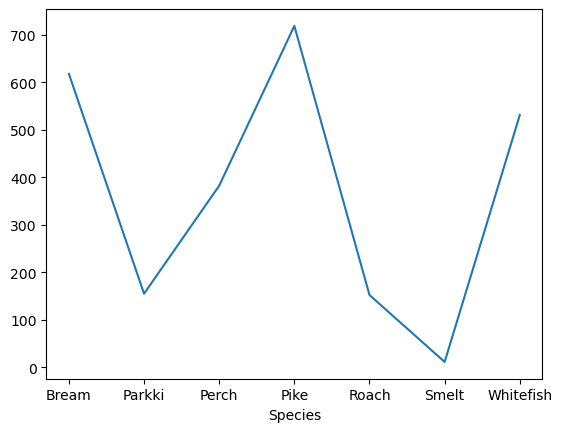

In [32]:
dataset.groupby(["Species"])["Weight"].mean().plot()

In [33]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =====================================================
# Helper: Evaluate model
# =====================================================
def evaluate_model(y_test, y_pred, label):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== {label} =====")
    print(f"MAE :  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")
    return mae, rmse, r2


# =====================================================
# CASE 1: Volume + Species Dummies
# =====================================================

# Make copy so we don’t break original
data1 = dataset.copy()

# Create Volume feature
data1["Volume"] = data1["Length3"] * data1["Width"] * data1["Height"]

# One-hot encode species
data1 = pd.get_dummies(data1, columns=["Species"], drop_first=True, dtype=float)

X1 = data1.drop("Weight", axis=1)
y1 = data1["Weight"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)

y1_pred = model1.predict(X1_test)

results1 = evaluate_model(y1_test, y1_pred, "CASE 1: Volume + Species Dummies")


# =====================================================
# CASE 2: Drop correlated variables
# Remove Length1, Length2, Height
# + keep original Length3, Width, Volume not included
# =====================================================

data2 = dataset.copy()

# One-hot encode species
data2 = pd.get_dummies(data2, columns=["Species"], drop_first=True, dtype=float)

# Drop multicollinear variables
data2 = data2.drop(["Length1", "Length2", "Height"], axis=1)

X2 = data2.drop("Weight", axis=1)
y2 = data2["Weight"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)

y2_pred = model2.predict(X2_test)

results2 = evaluate_model(y2_test, y2_pred, "CASE 2: Drop L1, L2, Height")



===== CASE 1: Volume + Species Dummies =====
MAE :  43.7334
RMSE: 58.2286
R²  : 0.9762

===== CASE 2: Drop L1, L2, Height =====
MAE :  65.5282
RMSE: 84.8527
R²  : 0.9494


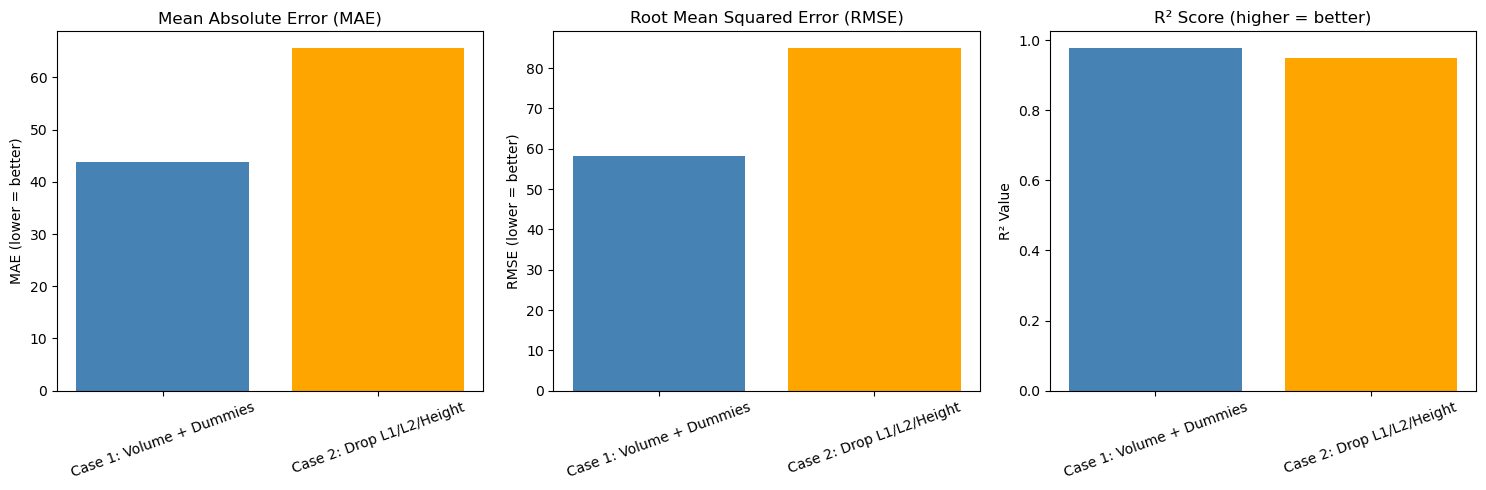

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Names of your 2 models
labels = ["Case 1: Volume + Dummies", "Case 2: Drop L1/L2/Height"]

# Metrics
mae_vals  = [results1[0], results2[0]]
rmse_vals = [results1[1], results2[1]]
r2_vals   = [results1[2], results2[2]]

# Define subplots
fig, axes = plt.subplots(1, 3, figsize=(15,5))

# -----------------------------------
# 1. MAE
# -----------------------------------
axes[0].bar(labels, mae_vals, color=["steelblue", "orange"])
axes[0].set_title("Mean Absolute Error (MAE)")
axes[0].set_ylabel("MAE (lower = better)")
axes[0].tick_params(axis='x', rotation=20)

# -----------------------------------
# 2. RMSE
# -----------------------------------
axes[1].bar(labels, rmse_vals, color=["steelblue", "orange"])
axes[1].set_title("Root Mean Squared Error (RMSE)")
axes[1].set_ylabel("RMSE (lower = better)")
axes[1].tick_params(axis='x', rotation=20)

# -----------------------------------
# 3. R²
# -----------------------------------
axes[2].bar(labels, r2_vals, color=["steelblue", "orange"])
axes[2].set_title("R² Score (higher = better)")
axes[2].set_ylabel("R² Value")
axes[2].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()



===== CASE 1: Volume + Species =====
MAE :  43.7334
RMSE: 58.2286
R²  : 0.9762

===== CASE 2: Drop L1/L2/Height =====
MAE :  65.5282
RMSE: 84.8527
R²  : 0.9494


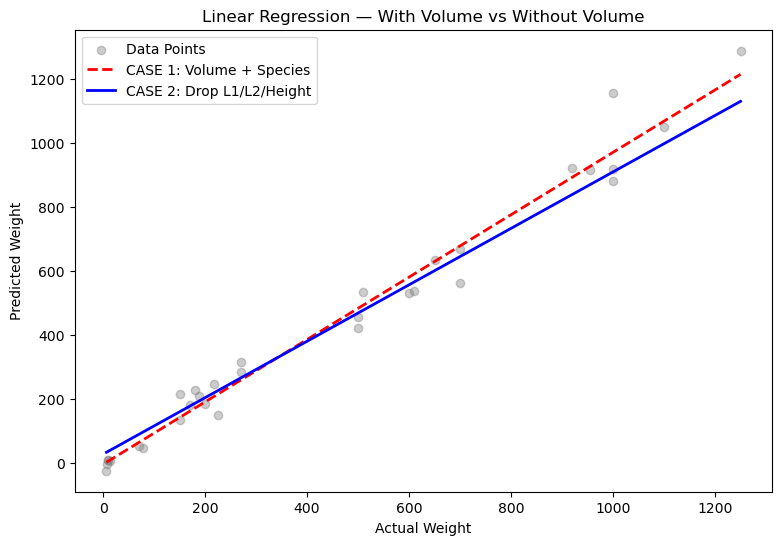

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =====================================================
# Helper function
# =====================================================
def evaluate_model(y_test, y_pred, label):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== {label} =====")
    print(f"MAE :  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")

    return mae, rmse, r2

# =====================================================
# CASE 1 — Volume + Species Dummies
# =====================================================

df1 = dataset.copy()

df1["Volume"] = df1["Length3"] * df1["Width"] * df1["Height"]
df1 = pd.get_dummies(df1, columns=["Species"], drop_first=True)

X1 = df1.drop("Weight", axis=1)
y1 = df1["Weight"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

model1 = LinearRegression()
model1.fit(X1_train, y1_train)
y1_pred = model1.predict(X1_test)

metrics1 = evaluate_model(y1_test, y1_pred, "CASE 1: Volume + Species")


# =====================================================
# CASE 2 — Drop L1/L2/Height
# =====================================================

df2 = dataset.copy()
df2 = pd.get_dummies(df2, columns=["Species"], drop_first=True)
df2 = df2.drop(["Length1", "Length2", "Height"], axis=1)

X2 = df2.drop("Weight", axis=1)
y2 = df2["Weight"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

metrics2 = evaluate_model(y2_test, y2_pred, "CASE 2: Drop L1/L2/Height")


# =====================================================
# 🔥 PLOT: Actual vs Predicted — BOTH MODELS
# =====================================================

# Sort by actual values so lines don't zigzag
order = np.argsort(y1_test.values)

x_sorted = y1_test.values[order]
y1_sorted = y1_pred[order]
y2_sorted = y2_pred[np.argsort(y2_test.values)]

plt.figure(figsize=(9,6))

# Scatter actual points
plt.scatter(y1_test, y1_pred, alpha=0.4, color="gray", label="Data Points")

# Best Linear Fit Lines (straight!)
coef1 = np.polyfit(y1_test, y1_pred, deg=1)
line1 = np.poly1d(coef1)
plt.plot(x_sorted, line1(x_sorted),
         "r--", linewidth=2,
         label="CASE 1: Volume + Species")

coef2 = np.polyfit(y2_test, y2_pred, deg=1)
line2 = np.poly1d(coef2)
plt.plot(np.sort(y2_test), line2(np.sort(y2_test)),
         "b-", linewidth=2,
         label="CASE 2: Drop L1/L2/Height")

plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Linear Regression — With Volume vs Without Volume")
plt.legend()
plt.show()



===== CASE 1 — Volume + Species Dummies =====
MAE :  40.075
RMSE: 57.632
R²  : 0.9766

===== CASE 2 — Drop L1/L2/Height =====
MAE :  50.245
RMSE: 75.463
R²  : 0.9600


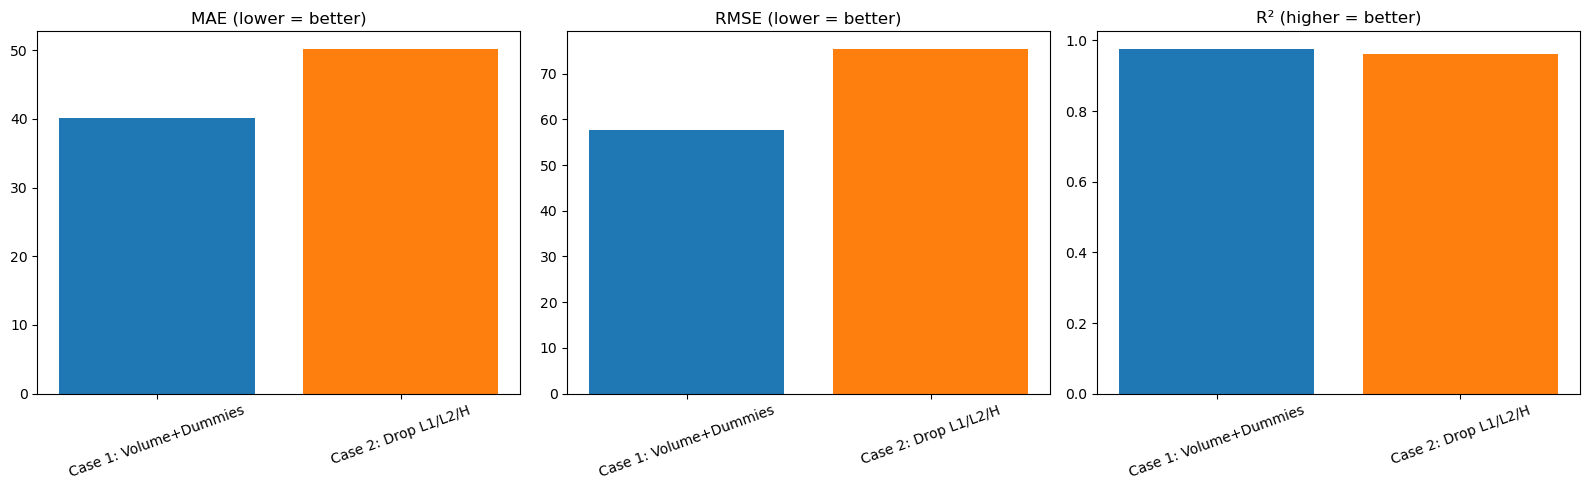

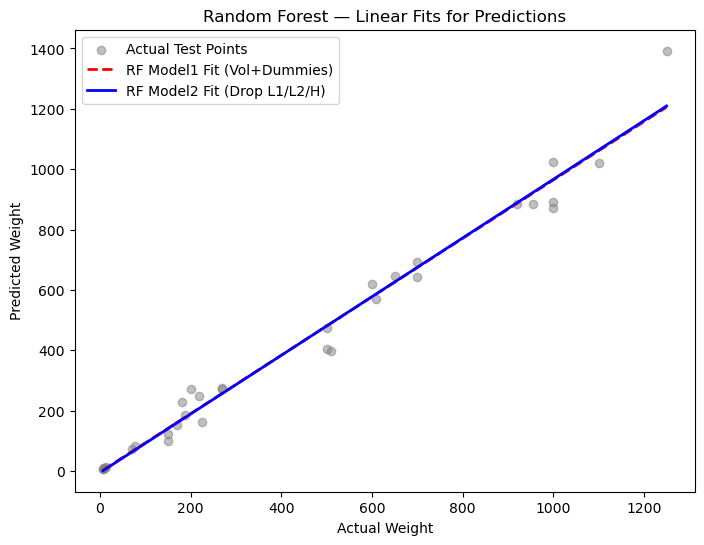

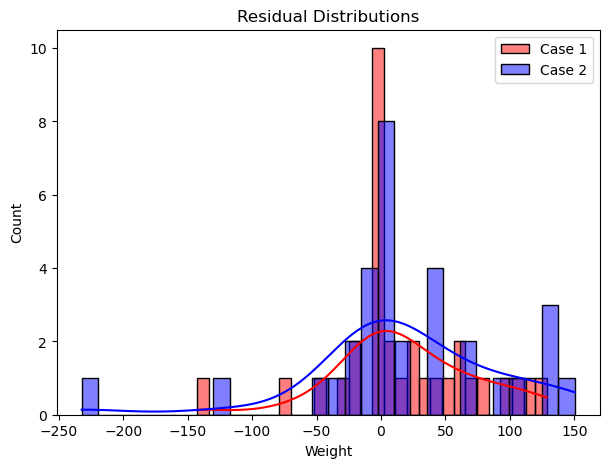

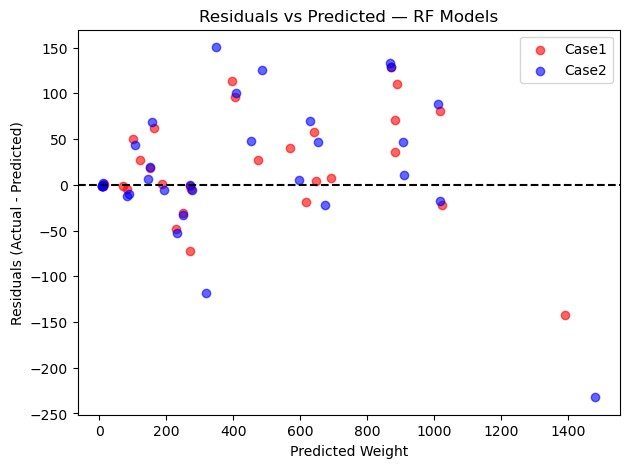

In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# Helper metric print function
# =============================
def evaluate(y_test, y_pred, label):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"\n===== {label} =====")
    print(f"MAE :  {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.4f}")
    
    return mae, rmse, r2


# ============================================================
# CASE 1 — Add VOLUME + ENCODE SPECIES
# ============================================================

data1 = dataset.copy()
data1["Volume"] = data1["Length3"] * data1["Height"] * data1["Width"]
data1 = pd.get_dummies(data1, columns=["Species"], drop_first=True)

X1 = data1.drop("Weight", axis=1)
y1 = data1["Weight"]

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42
)

rf1 = RandomForestRegressor(
    n_estimators=800,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf1.fit(X1_train, y1_train)
y1_pred = rf1.predict(X1_test)

results1 = evaluate(y1_test, y1_pred, "CASE 1 — Volume + Species Dummies")


# ============================================================
# CASE 2 — DROP MULTICOLLINEAR FEATURES
# ============================================================

data2 = dataset.copy()
data2 = pd.get_dummies(data2, columns=["Species"], drop_first=True)
data2 = data2.drop(["Length1", "Length2", "Height"], axis=1)

X2 = data2.drop("Weight", axis=1)
y2 = data2["Weight"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

rf2 = RandomForestRegressor(
    n_estimators=800,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf2.fit(X2_train, y2_train)
y2_pred = rf2.predict(X2_test)

results2 = evaluate(y2_test, y2_pred, "CASE 2 — Drop L1/L2/Height")


# ============================================================
#  VISUALIZE METRICS
# ============================================================
labels = ["Case 1: Volume+Dummies", "Case 2: Drop L1/L2/H"]
mae_vals = [results1[0], results2[0]]
rmse_vals = [results1[1], results2[1]]
r2_vals = [results1[2], results2[2]]

fig, ax = plt.subplots(1,3, figsize=(16,5))

ax[0].bar(labels, mae_vals, color=["#1f77b4", "#ff7f0e"])
ax[0].set_title("MAE (lower = better)")
ax[0].tick_params(axis="x", rotation=20)

ax[1].bar(labels, rmse_vals, color=["#1f77b4", "#ff7f0e"])
ax[1].set_title("RMSE (lower = better)")
ax[1].tick_params(axis="x", rotation=20)

ax[2].bar(labels, r2_vals, color=["#1f77b4", "#ff7f0e"])
ax[2].set_title("R² (higher = better)")
ax[2].tick_params(axis="x", rotation=20)

plt.tight_layout()
plt.show()


# ============================================================
#  ACTUAL vs PREDICTED WITH LINEAR FITS FOR BOTH RF MODELS
# ============================================================
order = np.argsort(y1_test.values)
x_sorted = y1_test.values[order]
rf1_sorted = y1_pred[order]
rf2_sorted = y2_pred[order]

plt.figure(figsize=(8,6))
plt.scatter(y1_test, y1_pred, alpha=0.5, color="gray", label="Actual Test Points")

coef1 = np.polyfit(y1_test, y1_pred, deg=1)
line1 = np.poly1d(coef1)
plt.plot(x_sorted, line1(x_sorted), "r--", linewidth=2,
         label="RF Model1 Fit (Vol+Dummies)")

coef2 = np.polyfit(y1_test, y2_pred, deg=1)
line2 = np.poly1d(coef2)
plt.plot(x_sorted, line2(x_sorted), "b-", linewidth=2,
         label="RF Model2 Fit (Drop L1/L2/H)")

plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Random Forest — Linear Fits for Predictions")
plt.legend()
plt.show()


# ============================================================
# RESIDUAL ANALYSIS
# ============================================================
res1 = y1_test - y1_pred
res2 = y2_test - y2_pred

# Histogram
plt.figure(figsize=(7,5))
sns.histplot(res1, bins=30, color='red', alpha=0.5, kde=True, label="Case 1")
sns.histplot(res2, bins=30, color='blue', alpha=0.5, kde=True, label="Case 2")
plt.title("Residual Distributions")
plt.legend()
plt.show()

# Residuals vs Predictions
plt.figure(figsize=(7,5))
plt.scatter(y1_pred, res1, alpha=0.6, color="red", label="Case1")
plt.scatter(y2_pred, res2, alpha=0.6, color="blue", label="Case2")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted Weight")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residuals vs Predicted — RF Models")
plt.legend()
plt.show()



===== Linear Regression (Volume + Species) =====
MAE :  43.733
RMSE: 58.229
R²  : 0.9762

===== Random Forest (Volume + Species) =====
MAE :  40.075
RMSE: 57.632
R²  : 0.9766


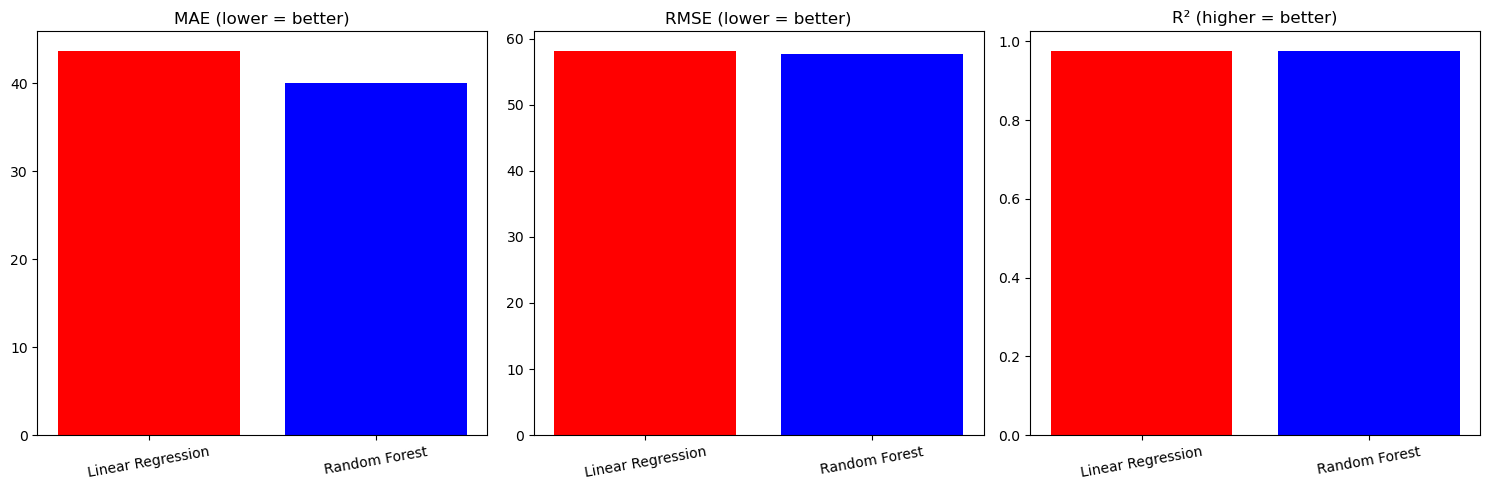

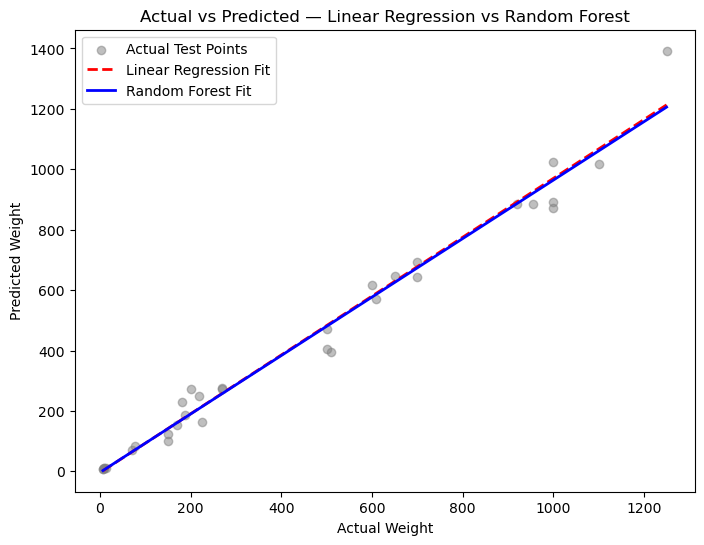

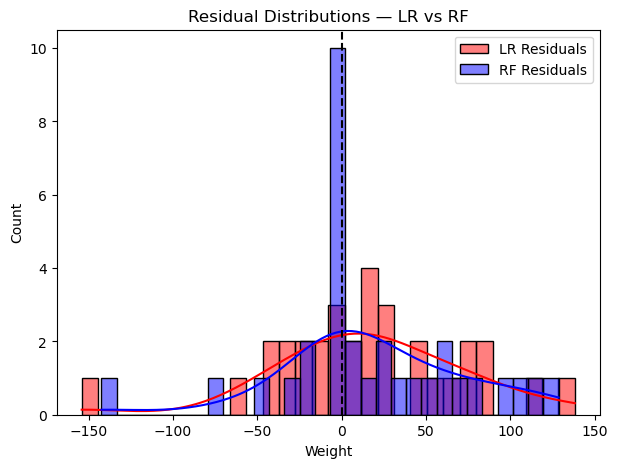

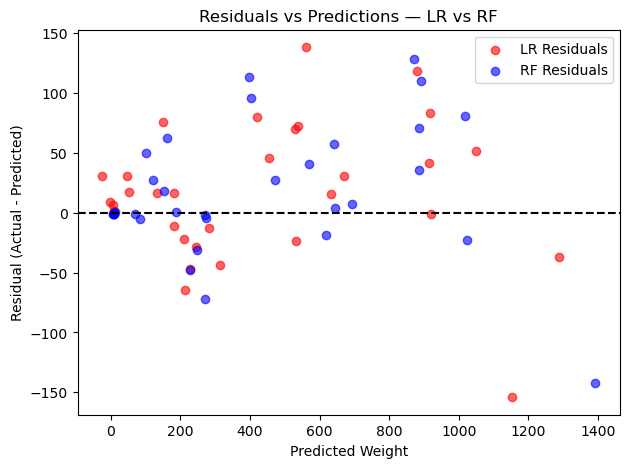

In [37]:
# ===========================
#  IMPORTS
# ===========================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# ===========================
# 1. DATA PREPARATION
# ===========================

df = dataset.copy()

# Create Volume feature
df["Volume"] = df["Length3"] * df["Height"] * df["Width"]

# Encode species
df = pd.get_dummies(df, columns=["Species"], drop_first=True)

X = df.drop("Weight", axis=1)
y = df["Weight"]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===========================
# 2. LINEAR REGRESSION MODEL
# ===========================
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# ===========================
# 3. RANDOM FOREST MODEL
# ===========================
rf = RandomForestRegressor(
    n_estimators=800,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ===========================
# 4. METRICS
# ===========================

def evaluate(name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n===== {name} =====")
    print(f"MAE :  {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²  : {r2:.4f}")
    return mae, rmse, r2

m_lr = evaluate("Linear Regression (Volume + Species)", y_test, y_pred_lr)
m_rf = evaluate("Random Forest (Volume + Species)", y_test, y_pred_rf)

# ===========================
# 5. METRICS BAR PLOT
# ===========================

labels = ["Linear Regression", "Random Forest"]
mae_vals  = [m_lr[0], m_rf[0]]
rmse_vals = [m_lr[1], m_rf[1]]
r2_vals   = [m_lr[2], m_rf[2]]

fig, axes = plt.subplots(1, 3, figsize=(15,5))

axes[0].bar(labels, mae_vals, color=["red", "blue"])
axes[0].set_title("MAE (lower = better)")
axes[0].tick_params(axis="x", rotation=10)

axes[1].bar(labels, rmse_vals, color=["red", "blue"])
axes[1].set_title("RMSE (lower = better)")
axes[1].tick_params(axis="x", rotation=10)

axes[2].bar(labels, r2_vals, color=["red", "blue"])
axes[2].set_title("R² (higher = better)")
axes[2].tick_params(axis="x", rotation=10)

plt.tight_layout()
plt.show()

# ===========================
# 6. ACTUAL vs PREDICTED LINES
# ===========================

# Sort by actual for smooth line plotting
order = np.argsort(y_test.values)
x_sorted = y_test.values[order]
lr_sorted = y_pred_lr[order]
rf_sorted = y_pred_rf[order]

plt.figure(figsize=(8,6))

# Actual scatter points
plt.scatter(y_test, y_pred_rf, color="gray", alpha=0.5, label="Actual Test Points")

# Linear Regression line
coef_lr = np.polyfit(y_test, y_pred_lr, deg=1)
line_lr = np.poly1d(coef_lr)
plt.plot(x_sorted, line_lr(x_sorted),
         "r--", linewidth=2,
         label="Linear Regression Fit")

# Random Forest line (best linear fit)
coef_rf = np.polyfit(y_test, y_pred_rf, deg=1)
line_rf = np.poly1d(coef_rf)
plt.plot(x_sorted, line_rf(x_sorted),
         "b-", linewidth=2,
         label="Random Forest Fit")

plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Actual vs Predicted — Linear Regression vs Random Forest")
plt.legend()
plt.show()

# ===========================
# 7. RESIDUAL PLOTS
# ===========================

res_lr = y_test - y_pred_lr
res_rf = y_test - y_pred_rf

# Residual histogram comparison
plt.figure(figsize=(7,5))
sns.histplot(res_lr, bins=30, kde=True, color="red", alpha=0.5, label="LR Residuals")
sns.histplot(res_rf, bins=30, kde=True, color="blue", alpha=0.5, label="RF Residuals")
plt.axvline(0, color="black", linestyle="--")
plt.title("Residual Distributions — LR vs RF")
plt.legend()
plt.show()

# Residual vs prediction scatter
plt.figure(figsize=(7,5))
plt.scatter(y_pred_lr, res_lr, alpha=0.6, color="red", label="LR Residuals")
plt.scatter(y_pred_rf, res_rf, alpha=0.6, color="blue", label="RF Residuals")
plt.axhline(0, color="black", linestyle="--")
plt.xlabel("Predicted Weight")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predictions — LR vs RF")
plt.legend()
plt.show()



===== Average R² Across 10 Splits =====
Bream: 0.8994
Parkki: 0.7678
Perch: 0.9789
Pike: 0.7693
Roach: 0.7217
Smelt: 0.7008
Whitefish: 0.9631


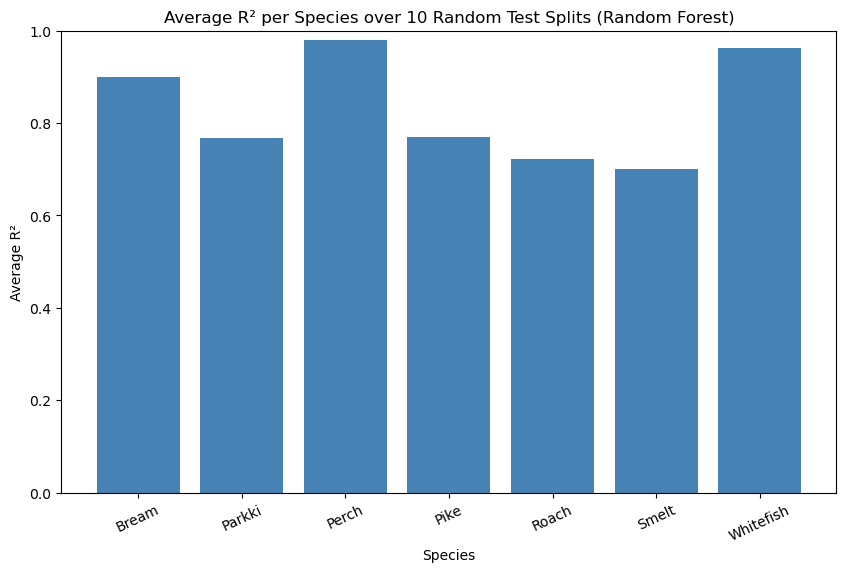

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Copy the dataset
df = dataset.copy()

# Create volume feature
df["Volume"] = df["Length3"] * df["Height"] * df["Width"]

# One-hot encode species
df = pd.get_dummies(df, columns=["Species"], drop_first=False)

# Separate X and y
X = df.drop("Weight", axis=1)
y = df["Weight"]

species_cols = [c for c in X.columns if c.startswith("Species_")]

# Storage for repeated R² per species
species_r2_store = {sp.replace("Species_", ""): [] for sp in species_cols}

# ==========================================
# REPEAT SPLITS 10 TIMES
# ==========================================
for seed in range(10):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )
    
    # Train RF
    rf = RandomForestRegressor(
        n_estimators=800,
        min_samples_leaf=2,
        random_state=seed,
        n_jobs=-1
    )
    rf.fit(X_train, y_train)
    
    y_pred = rf.predict(X_test)
    
    # Calculate R² per species
    for sp in species_cols:
        mask = X_test[sp] == 1
        species_name = sp.replace("Species_", "")
        
        # Only if at least 3 samples exist — avoid unstable values
        if mask.sum() >= 3:
            r2 = r2_score(y_test[mask], y_pred[mask])
            species_r2_store[species_name].append(r2)

# ==========================================
# AVERAGE R²
# ==========================================
average_r2 = {sp: np.mean(vals) for sp, vals in species_r2_store.items()}

print("\n===== Average R² Across 10 Splits =====")
for sp, r in average_r2.items():
    print(f"{sp}: {r:.4f}")

# ==========================================
# BAR PLOT
# ==========================================
plt.figure(figsize=(10,6))
plt.bar(average_r2.keys(), average_r2.values(), color="steelblue")
plt.ylabel("Average R²")
plt.xlabel("Species")
plt.ylim(0,1)
plt.title("Average R² per Species over 10 Random Test Splits (Random Forest)")
plt.xticks(rotation=25)
plt.show()


## Mixed Effect Model


=== NULL MIXED MODEL ===
         Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: Weight    
No. Observations: 159     Method:             ML        
No. Groups:       7       Scale:              83757.5516
Min. group size:  6       Log-Likelihood:     -1135.8608
Max. group size:  56      Converged:          Yes       
Mean group size:  22.7                                  
--------------------------------------------------------
            Coef.   Std.Err.   z   P>|z|  [0.025  0.975]
--------------------------------------------------------
Intercept   367.260   93.983 3.908 0.000 183.057 551.463
Group Var 56257.540  116.558                            

AIC Null model: 2277.721586913014

=== MIXED MODEL WITH HEIGHT ===
           Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  Weight    
No. Observations:   159      Method:              ML        
No. Groups:         7        Scale:               16429.8195


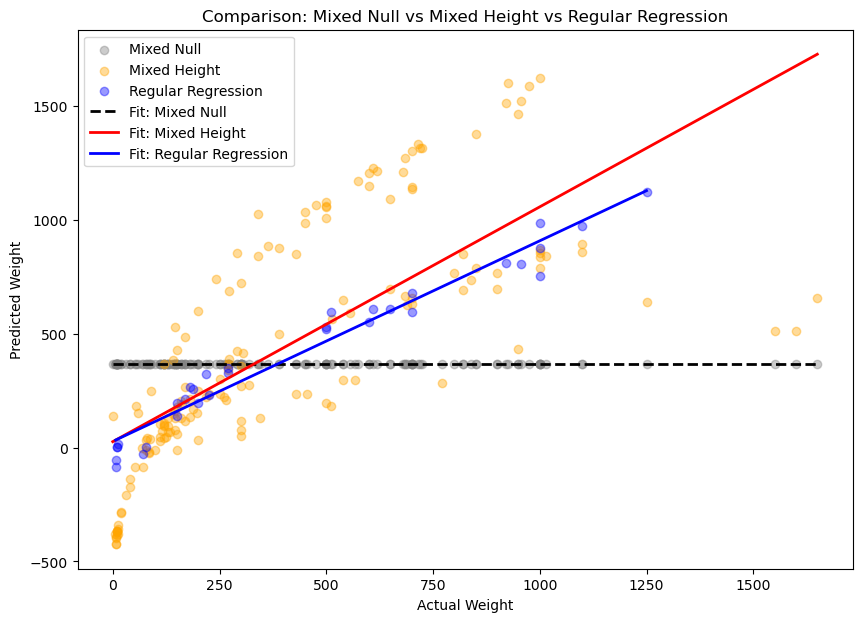

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# =====================================================
# Helper function for regular regression
# =====================================================
def evaluate_model(y_true, y_pred, label):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n===== {label} =====")
    print(f"MAE : {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²  : {r2:.4f}")
    return mae, rmse, r2


# =====================================================
# PREPARE DATA
# =====================================================
df = dataset.copy()
df["Species"] = df["Species"].astype("category")

# =====================================================
# CASE 1 Null mixed model (random intercept only)
# =====================================================
lme_null = smf.mixedlm("Weight ~ 1", df, groups=df["Species"])
lme_null_result = lme_null.fit(reml=False)

print("\n=== NULL MIXED MODEL ===")
print(lme_null_result.summary())

# AIC
aic_null = lme_null_result.aic
print("AIC Null model:", aic_null)

# =====================================================
# CASE 2 Mixed model with Height
# =====================================================
lme_height = smf.mixedlm("Weight ~ Height", df, groups=df["Species"])
lme_height_result = lme_height.fit(reml=False)

print("\n=== MIXED MODEL WITH HEIGHT ===")
print(lme_height_result.summary())

# AIC
aic_height = lme_height_result.aic
print("AIC Mixed model with Height:", aic_height)

# Predictions for plotting
df["Pred_mixed_null"] = lme_null_result.predict()
df["Pred_mixed_height"] = lme_height_result.predict()


# =====================================================
# CASE 3 Regular linear regression (Drop L1/L2/Height)
# =====================================================
df2 = dataset.copy()
df2 = pd.get_dummies(df2, columns=["Species"], drop_first=True)
df2 = df2.drop(["Length1", "Length2", "Height"], axis=1)

X2 = df2.drop("Weight", axis=1)
y2 = df2["Weight"]

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42
)

model2 = LinearRegression()
model2.fit(X2_train, y2_train)
y2_pred = model2.predict(X2_test)

# Evaluation
metrics2 = evaluate_model(y2_test, y2_pred, "Regular regression: Drop L1/L2/Height")

# Store predictions aligned with df
df.loc[X2_test.index, "Pred_regular"] = y2_pred

# =====================================================
# PLOT: Actual vs Predicted FOR ALL 3 MODELS
# =====================================================
plt.figure(figsize=(10, 7))

# Scatter points
plt.scatter(df["Weight"], df["Pred_mixed_null"], alpha=0.4, label="Mixed Null", color="gray")
plt.scatter(df["Weight"], df["Pred_mixed_height"], alpha=0.4, label="Mixed Height", color="orange")
plt.scatter(y2_test, y2_pred, alpha=0.4, label="Regular Regression", color="blue")

# Draw lines
def add_fit_line(x, y, style, label):
    coef = np.polyfit(x, y, 1)
    line = np.poly1d(coef)
    xs = np.sort(x)
    plt.plot(xs, line(xs), style, linewidth=2, label=label)

add_fit_line(df["Weight"], df["Pred_mixed_null"], "k--", "Fit: Mixed Null")
add_fit_line(df["Weight"], df["Pred_mixed_height"], "r-", "Fit: Mixed Height")
add_fit_line(y2_test, y2_pred, "b-", "Fit: Regular Regression")

plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.title("Comparison: Mixed Null vs Mixed Height vs Regular Regression")
plt.legend()
plt.show()
